# Importing and Reading the dataset

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
df = pd.read_csv(r"C:\Users\sinha\Desktop\survey.csv")
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [27]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

# EDA, Initial Visualization and Cleaning
* In this section, we will have to look at the graphs of the raw data and visualize it to look for the possile clean up that needs to be processed or needs a little adjustment

In [28]:
print(df.isnull().sum())

Timestamp                       0
Age                             0
Gender                          0
Country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64


In [29]:
df1=df.drop(['comments'], axis=1)

* Dropped the comments column which has the most null values and will not be of any use for understanding the data.

In [30]:
#Checking for the percentage of missing datas in the  following columns
X1 = [df1['work_interfere'], df1['state'], df1['self_employed']]
sum = 0

for i in X1:
    sum+=i.isnull().sum()
    x = (i.isnull().sum()/len(i)*100)
    print(f'Percentage of {i.name} missing values {x:.2f}')

Percentage of work_interfere missing values 20.97
Percentage of state missing values 40.91
Percentage of self_employed missing values 1.43


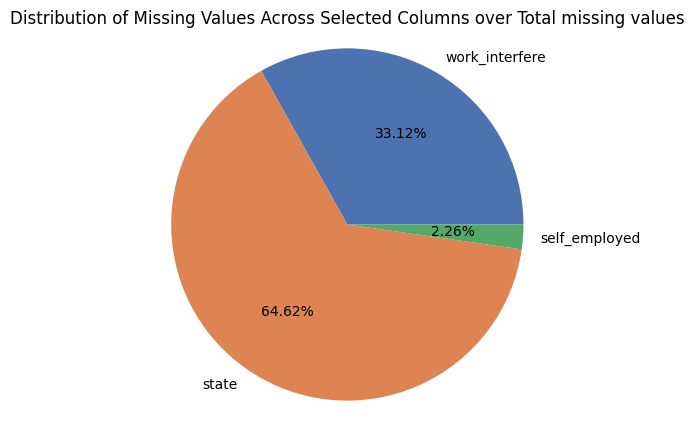

In [31]:
#Visualizing the missing values of each columns over the total missing values 
labels= [i.name for i in X1]
sizes = [((i.isnull().sum()/sum)*100) for i in X1]

plt.figure(figsize=(5, 5))
plt.pie(sizes, labels=labels, autopct='%1.2f%%', startangle=0, colors=sns.color_palette('deep'))
plt.title('Distribution of Missing Values Across Selected Columns over Total missing values')
plt.axis('equal')
plt.show()

In [32]:
#Handling Missing Values
df1['self_employed'] = df1['self_employed'].fillna('Unknown')
df1['work_interfere'] = df1['work_interfere'].fillna('Unknown')

In [33]:
# Removing the unrealistic ages
df1.drop(df1[df1['Age'] > 60].index, inplace = True)
df1.drop(df1[df1['Age'] < 20].index, inplace = True)

Text(0.5, 1.0, 'Age Distibution')

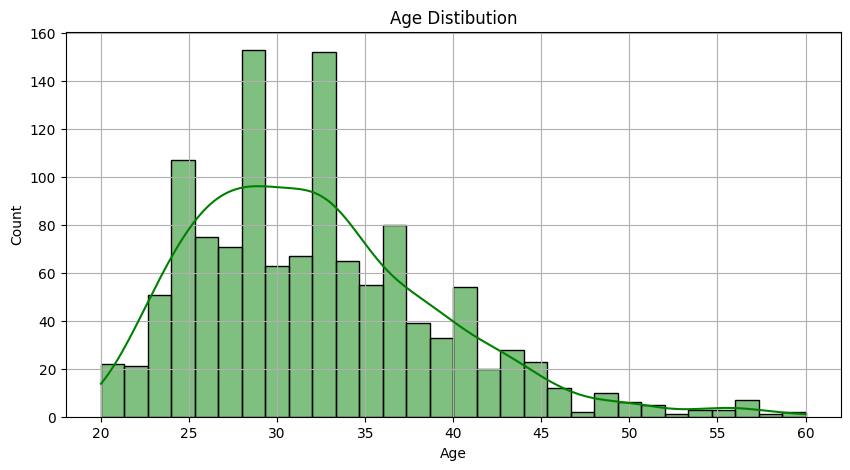

In [34]:
plt.figure(figsize=(10,5))
sns.histplot(df1, x='Age', bins=30, kde=True, color='g',)
plt.grid()
plt.title('Age Distibution')

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48],
 [Text(0, 0, 'Female'),
  Text(1, 0, 'M'),
  Text(2, 0, 'Male'),
  Text(3, 0, 'male'),
  Text(4, 0, 'female'),
  Text(5, 0, 'm'),
  Text(6, 0, 'Male-ish'),
  Text(7, 0, 'maile'),
  Text(8, 0, 'Trans-female'),
  Text(9, 0, 'Cis Female'),
  Text(10, 0, 'F'),
  Text(11, 0, 'something kinda male?'),
  Text(12, 0, 'Cis Male'),
  Text(13, 0, 'Woman'),
  Text(14, 0, 'f'),
  Text(15, 0, 'Mal'),
  Text(16, 0, 'Male (CIS)'),
  Text(17, 0, 'queer/she/they'),
  Text(18, 0, 'non-binary'),
  Text(19, 0, 'Femake'),
  Text(20, 0, 'woman'),
  Text(21, 0, 'Make'),
  Text(22, 0, 'Nah'),
  Text(23, 0, 'All'),
  Text(24, 0, 'Enby'),
  Text(25, 0, 'fluid'),
  Text(26, 0, 'Genderqueer'),
  Text(27, 0, 'Female '),
  Text(28, 0, '

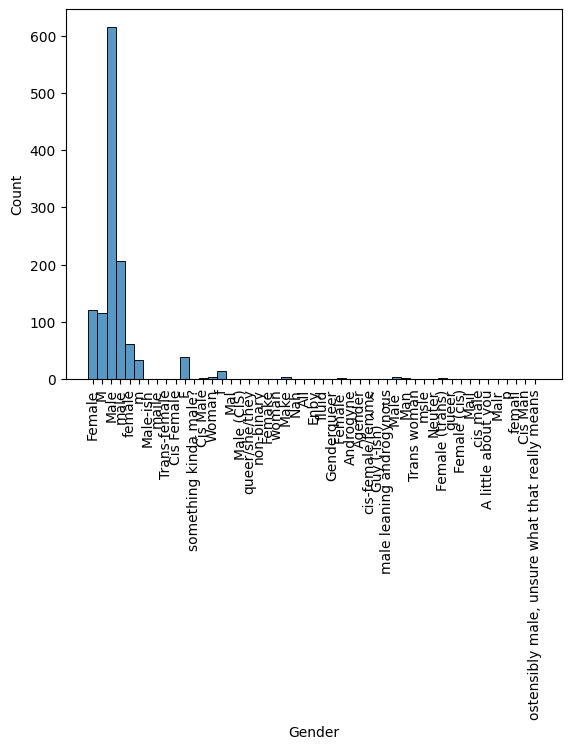

In [35]:
sns.histplot(df, x='Gender', bins=30)
plt.xticks(rotation=90)

* According to the gender column we can see that there is the whole spectrum of gender, which is very absurd. So, it needs some heavy categorization.

In [36]:
def gender(g):
    g = str(g).strip().lower()
    
    male = ['male', 'm', 'male-ish', 'maile', 'mal', 'msle', 'malr', 'cis male', 'cis-man', 'man']
    female = ['female', 'f', 'woman', 'femail', 'cis female', 'cis-female/femme', 'female (cis)']
    
    if g in male:
        return 'Male'
    elif g in female:
        return 'Female'
    else:
        return 'Other'
df1['Gender_cleaned'] = df1['Gender'].apply(gender)

In [37]:
df2=df1.drop(['Gender'], axis=1)

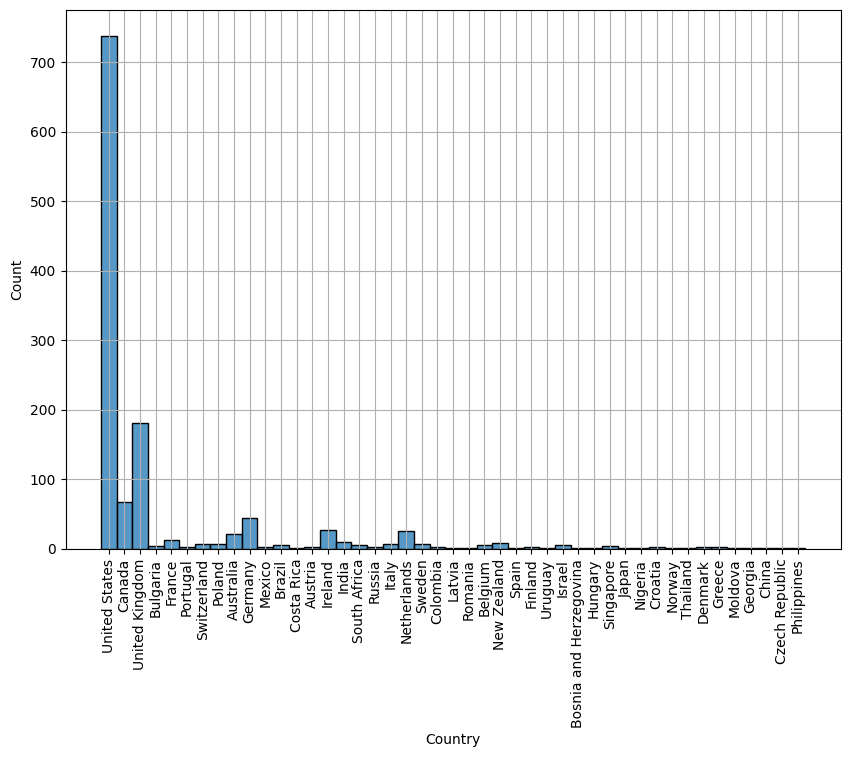

In [38]:
plt.figure(figsize=(10,7))
sns.histplot(df2, x='Country', bins=30)
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [39]:
df3=df2.drop(['state'], axis=1)   #Thus column is also very useless

* Also, we can see that the column of  no of employees has very unconventional data which is not fit for further processing, in this column it can seen that there is range for the employee amount, so an approximaton has to be made

In [40]:
#Handling the Erratic nature of no_employees column
def employees(noe):
    update=[]
    for i in noe:
        if '-' in i:
            left, right = i.split('-')
            mean = int(((int(left)+int(right))*0.5))
            update.append(mean)
        elif 'More than' in i:
            split = int(i[10:])
            no = int(split*0.2)+split
            update.append(no)
    return update

df3['no_employees'] = employees(df3['no_employees'])


In [41]:
df3['no_employees'].value_counts()

no_employees
15      284
63      283
1200    280
300     175
3       151
750      58
Name: count, dtype: int64

* Summary

# Visualizing

In [42]:
data = pd.read_csv(r"C:\Users\sinha\Desktop\Cohort\Capestone\Survey Reprised 2.0.csv")

In [57]:
data.drop(data[data['Age'] < 21].index, inplace=True)
data.drop(data[data['Age'] > 45].index, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1173 entries, 0 to 1230
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Unnamed: 0                 1173 non-null   int64 
 1   Timestamp                  1173 non-null   object
 2   Age                        1173 non-null   int64 
 3   Country                    1173 non-null   object
 4   self_employed              1173 non-null   object
 5   family_history             1173 non-null   object
 6   treatment                  1173 non-null   object
 7   work_interfere             1173 non-null   object
 8   no_employees               1173 non-null   int64 
 9   remote_work                1173 non-null   object
 10  tech_company               1173 non-null   object
 11  benefits                   1173 non-null   object
 12  care_options               1173 non-null   object
 13  wellness_program           1173 non-null   object
 14  seek_help    

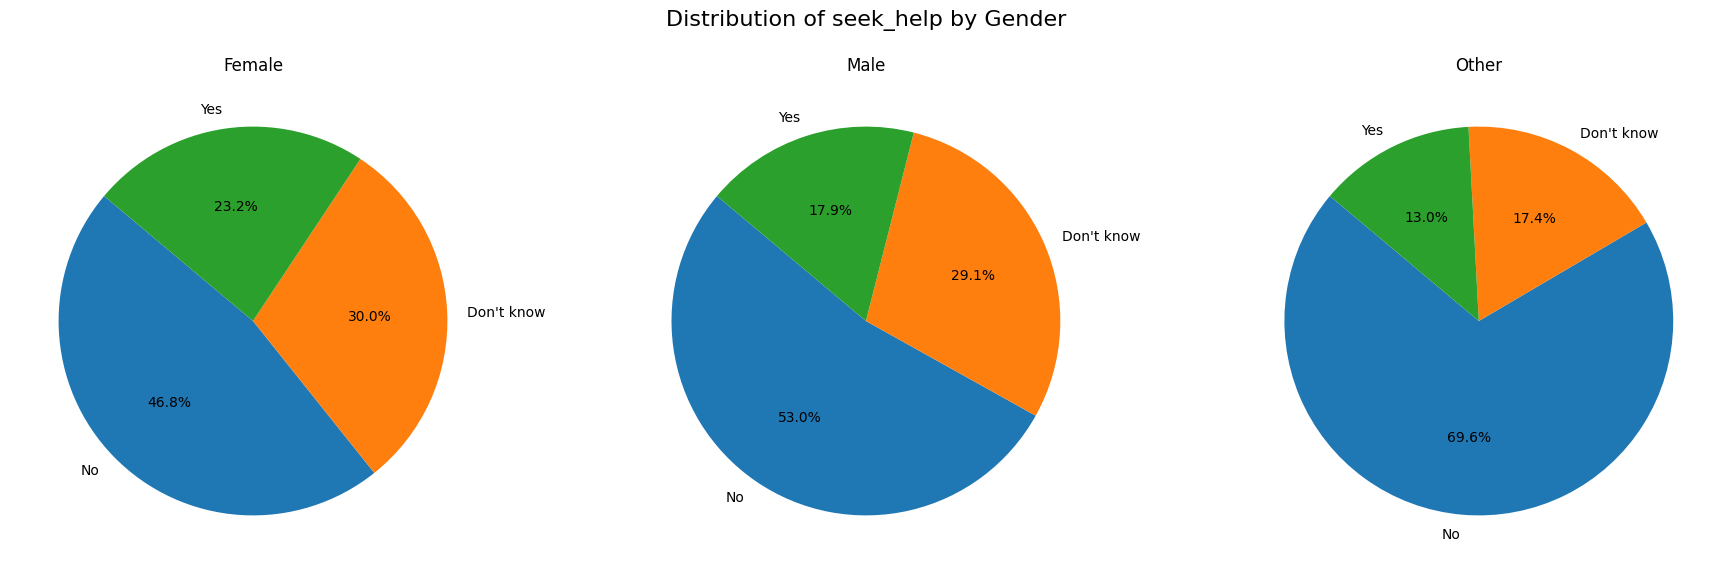

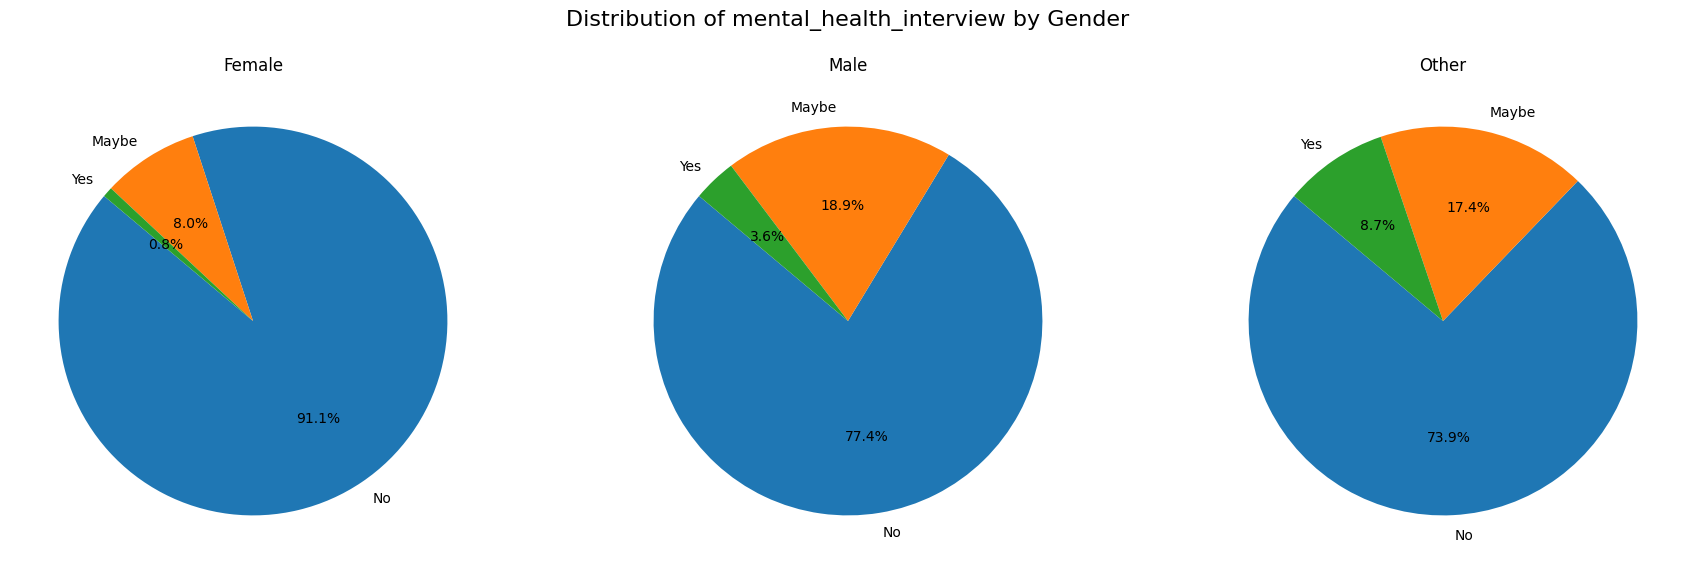

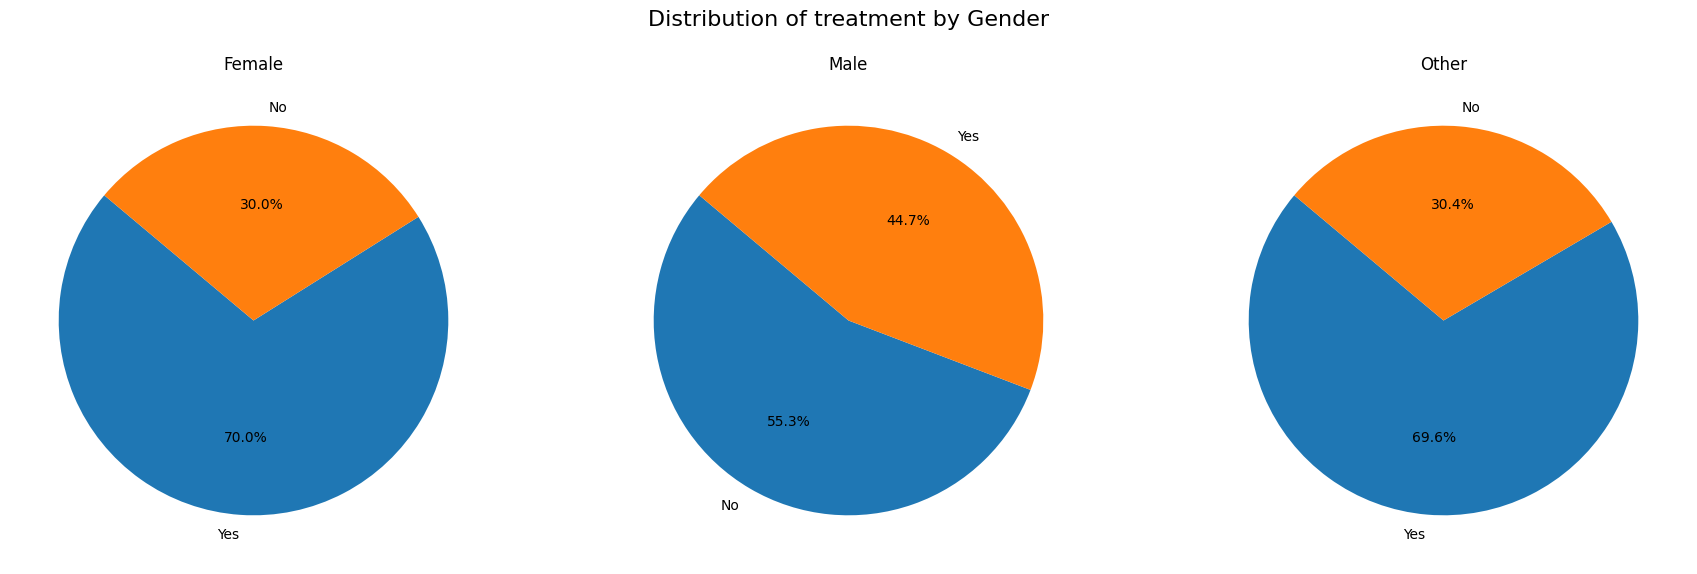

In [ ]:

hue_columns = ['seek_help', 'mental_health_interview', 'treatment']

genders = data['Gender_cleaned'].dropna().unique()

for hue in hue_columns:
    num_genders = len(genders)
    fig, axes = plt.subplots(1, num_genders, figsize=(6 * num_genders, 6))
    fig.suptitle(f'Distribution of {hue} by Gender', fontsize=16)

    for idx, gender in enumerate(genders):
        gender_data = data[data['Gender_cleaned'] == gender]
        hue_counts = gender_data[hue].value_counts(dropna=False)
        ax = axes[idx] if num_genders > 1 else axes
        ax.pie(hue_counts, labels=hue_counts.index, autopct='%1.1f%%', startangle=140)
        ax.set_title(f'{gender}')

    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()


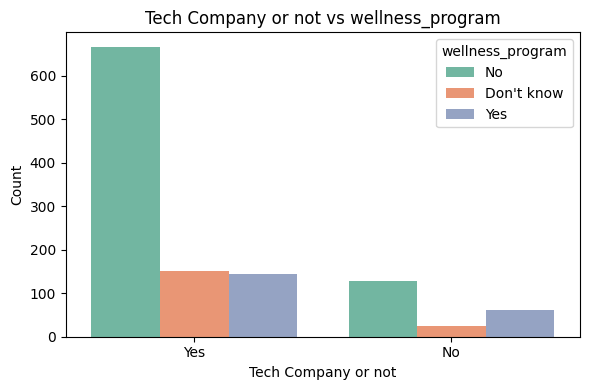

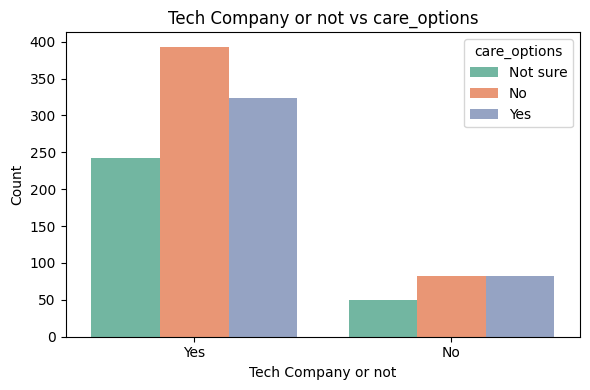

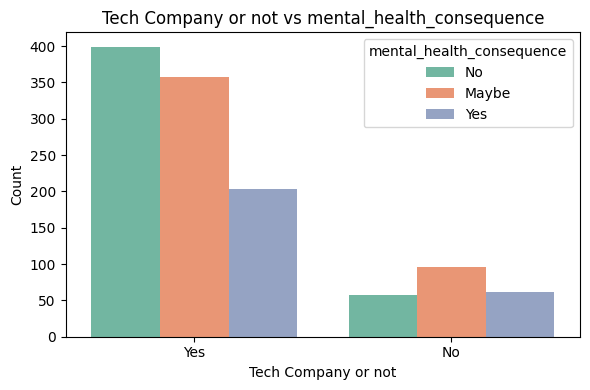

In [59]:
hue = ['wellness_program', 'care_options', 'mental_health_consequence']
for i in hue:
    plt.figure(figsize=(6, 4))
    sns.countplot(data, x='tech_company', hue=i, palette='Set2')
    plt.title(f'Tech Company or not vs {i}')
    plt.xlabel('Tech Company or not')
    plt.ylabel('Count')
    plt.legend(title=i)
    plt.tight_layout()
    plt.show()

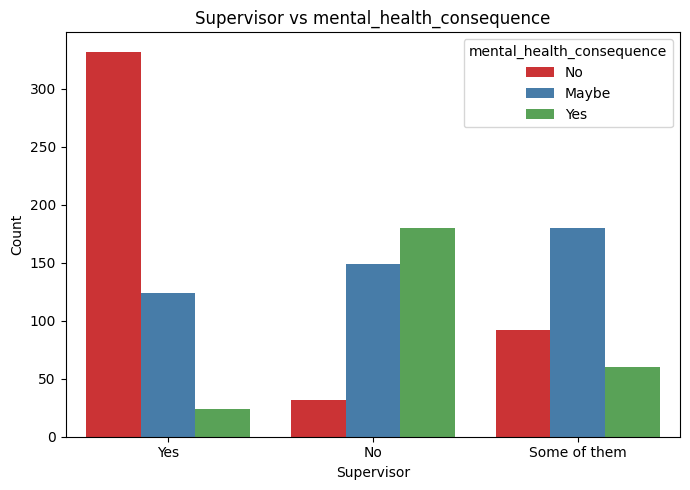

In [60]:
hue = ['mental_health_consequence']
for i in hue:
    plt.figure(figsize=(7, 5))
    sns.countplot(data, x='supervisor', hue=i, palette='Set1')
    plt.title(f'Supervisor vs {i}')
    plt.xlabel('Supervisor')
    plt.ylabel('Count')
    plt.legend(title=i)
    plt.tight_layout()
    plt.show()

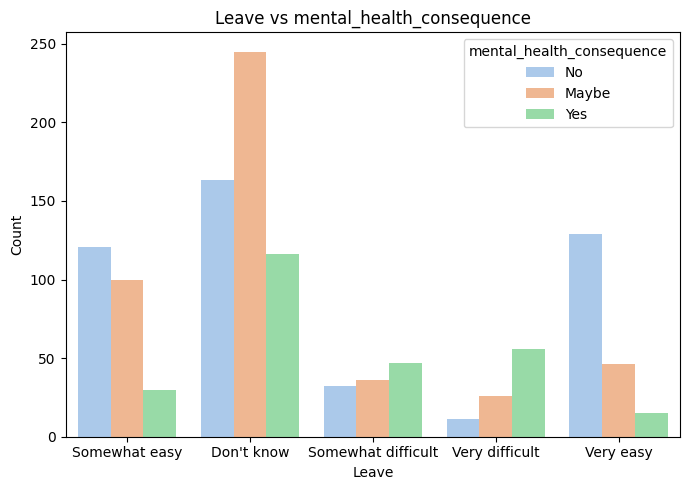

In [61]:
plt.figure(figsize=(7, 5))
sns.countplot(data, x='leave', hue='mental_health_consequence', palette='pastel')
plt.title(f'Leave vs {'mental_health_consequence'}')
plt.xlabel('Leave')
plt.ylabel('Count')
plt.legend(title='mental_health_consequence')
plt.tight_layout()
plt.show()

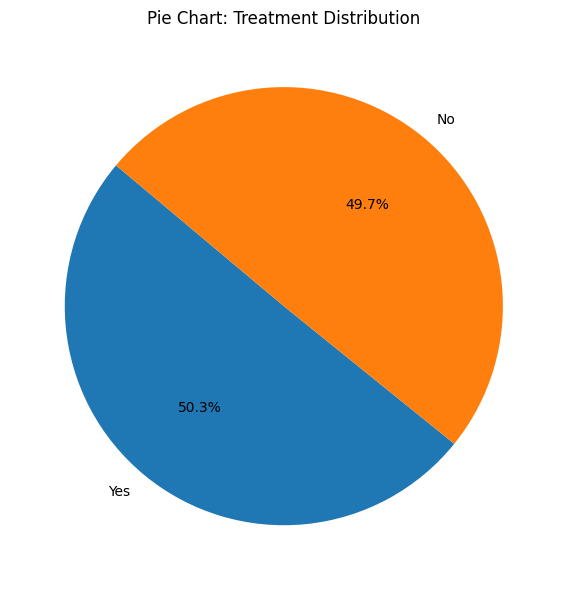

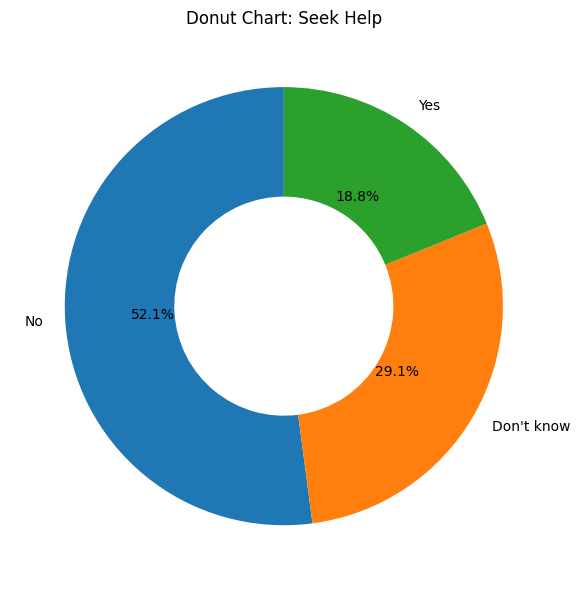

In [64]:
# Univariate analysis using a variety of plot types
#Pie Chart for Treatment (categorical)
plt.figure(figsize=(6, 6))
treatment_counts = data['treatment'].value_counts()
plt.pie(treatment_counts, labels=treatment_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Pie Chart: Treatment Distribution')
plt.tight_layout()
plt.show()

#Donut Chart for Seek Help (categorical)
plt.figure(figsize=(6, 6))
seek_help_counts = data['seek_help'].value_counts()
plt.pie(seek_help_counts, labels=seek_help_counts.index, autopct='%1.1f%%', startangle=90, wedgeprops=dict(width=0.5))
plt.title('Donut Chart: Seek Help')
plt.tight_layout()
plt.show()


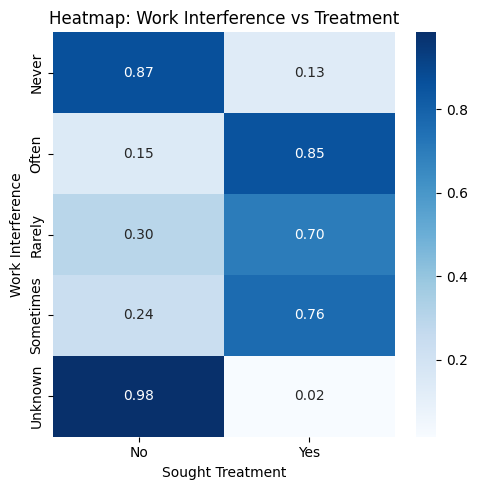

In [63]:
crosstab_work = pd.crosstab(data['work_interfere'], data['treatment'], normalize='index')

# Plot heatmap
plt.figure(figsize=(5, 5))
sns.heatmap(crosstab_work, annot=True, cmap='Blues', fmt='.2f')
plt.title('Heatmap: Work Interference vs Treatment')
plt.xlabel('Sought Treatment')
plt.ylabel('Work Interference')
plt.tight_layout()
plt.show()


* Summary